# DeepLabCut Toolbox
https://github.com/AlexEMG/DeepLabCut

Nath\*, Mathis\* et al. Using DeepLabCut for 3D markerless pose estimation during behavior across species.

pre-print: https://www.biorxiv.org/content/10.1101/476531v1

This notebook demonstrates the necessary steps to use DeepLabCut for your own project.
This shows the most simple code to do so, but many of the functions have additional features, so please check out the overview & the protocol paper!

This notebook illustrates how to:
- create a project
- extract training frames
- label the frames
- plot the labeled images
- create a training set
- train a network
- evaluate a network
- analyze a novel video
- create an automatically labeled video 
- plot the trajectories

## Create a new project

It is always good idea to keep the projects seperate. This function creates a new project with subdirectories and a basic configuration file in the user defined directory otherwise the project is created in the current working directory.

You can always add new videos to the project at any stage of the project. 

In [1]:
import deeplabcut

In [ ]:
#deeplabcut.create_new_project?

In [3]:
task='fighting' # Enter the name of your experiment Task
experimenter='Julian' # Enter the name of the experimenter
video=[r'Z:\julian\20190703_dalotia_arm_disarm\bias_video_cam_0_date_2019_07_03_time_12_07_49_v001.fmf'] # Enter the paths of your videos you want to grab frames from.

path_config_file=deeplabcut.create_new_project(task,experimenter,video, working_directory='../../dalotia_disarm',copy_videos=False, ) 
#change the working directory to where you want the project created.

# The function returns the path, where your project is. 
# You could also enter this manually (e.g. if the project is already created and you want to pick up, where you stopped...)
#path_config_file = '/home/Mackenzie/Reaching/config.yaml' # Enter the path of the config file that was just created from the above step (check the folder)

Created "C:\Users\jwagner2\git\dalotia_disarm\fighting-Julian-2019-07-08\videos"
Created "C:\Users\jwagner2\git\dalotia_disarm\fighting-Julian-2019-07-08\labeled-data"
Created "C:\Users\jwagner2\git\dalotia_disarm\fighting-Julian-2019-07-08\training-datasets"
Created "C:\Users\jwagner2\git\dalotia_disarm\fighting-Julian-2019-07-08\dlc-models"
Creating the symbolic link of the video
run the following command with elevated permissions:
mklink C:\Users\jwagner2\git\dalotia_disarm\fighting-Julian-2019-07-08\videos\bias_video_cam_0_date_2019_07_03_time_12_07_49_v001.fmf Z:\julian\20190703_dalotia_arm_disarm\bias_video_cam_0_date_2019_07_03_time_12_07_49_v001.fmf
Have you run the command?


yes/no yes


Created the symlink of Z:\julian\20190703_dalotia_arm_disarm\bias_video_cam_0_date_2019_07_03_time_12_07_49_v001.fmf to C:\Users\jwagner2\git\dalotia_disarm\fighting-Julian-2019-07-08\videos\bias_video_cam_0_date_2019_07_03_time_12_07_49_v001.fmf
C:\Users\jwagner2\git\dalotia_disarm\fighting-Julian-2019-07-08\videos\bias_video_cam_0_date_2019_07_03_time_12_07_49_v001.fmf
Generated "C:\Users\jwagner2\git\dalotia_disarm\fighting-Julian-2019-07-08\config.yaml"

A new project with name fighting-Julian-2019-07-08 is created at C:\Users\jwagner2\git\dalotia_disarm and a configurable file (config.yaml) is stored there. Change the parameters in this file to adapt to your project's needs.
 Once you have changed the configuration file, use the function 'extract_frames' to select frames for labeling.
. [OPTIONAL] Use the function 'add_new_videos' to add new videos to your project (at any stage).


In [2]:
task='fighting' # Enter the name of your experiment Task
experimenter='Julian' # Enter the name of the experimenter
video=[r'Z:\julian\20190114_ant_scepto_male\20190114_ant_scepto_male_cam_0_date_2019_01_14_time_17_40_14_v001.fmf',
       r'Z:\julian\20190322_ant_bug\20190322_ant_bug_cam_1_date_2019_03_22_time_14_06_53_v001.fmf'] # Enter the paths of your videos you want to grab frames from.

path_config_file=deeplabcut.create_new_project(task,experimenter,video, working_directory='../../scepto_bug_arena',copy_videos=False, ) 
#change the working directory to where you want the project created.

# The function returns the path, where your project is. 
# You could also enter this manually (e.g. if the project is already created and you want to pick up, where you stopped...)
#path_config_file = '/home/Mackenzie/Reaching/config.yaml' # Enter the path of the config file that was just created from the above step (check the folder)

Created "C:\Users\jwagner2\git\scepto_bug_arena\fighting-Julian-2019-07-08\videos"
Created "C:\Users\jwagner2\git\scepto_bug_arena\fighting-Julian-2019-07-08\labeled-data"
Created "C:\Users\jwagner2\git\scepto_bug_arena\fighting-Julian-2019-07-08\training-datasets"
Created "C:\Users\jwagner2\git\scepto_bug_arena\fighting-Julian-2019-07-08\dlc-models"
Creating the symbolic link of the video
run the following command with elevated permissions:
mklink C:\Users\jwagner2\git\scepto_bug_arena\fighting-Julian-2019-07-08\videos\20190114_ant_scepto_male_cam_0_date_2019_01_14_time_17_40_14_v001.fmf Z:\julian\20190114_ant_scepto_male\20190114_ant_scepto_male_cam_0_date_2019_01_14_time_17_40_14_v001.fmf
Have you run the command?


yes/no yes


Created the symlink of Z:\julian\20190114_ant_scepto_male\20190114_ant_scepto_male_cam_0_date_2019_01_14_time_17_40_14_v001.fmf to C:\Users\jwagner2\git\scepto_bug_arena\fighting-Julian-2019-07-08\videos\20190114_ant_scepto_male_cam_0_date_2019_01_14_time_17_40_14_v001.fmf
run the following command with elevated permissions:
mklink C:\Users\jwagner2\git\scepto_bug_arena\fighting-Julian-2019-07-08\videos\20190322_ant_bug_cam_1_date_2019_03_22_time_14_06_53_v001.fmf Z:\julian\20190322_ant_bug\20190322_ant_bug_cam_1_date_2019_03_22_time_14_06_53_v001.fmf
Have you run the command?


yes/no yes


Created the symlink of Z:\julian\20190322_ant_bug\20190322_ant_bug_cam_1_date_2019_03_22_time_14_06_53_v001.fmf to C:\Users\jwagner2\git\scepto_bug_arena\fighting-Julian-2019-07-08\videos\20190322_ant_bug_cam_1_date_2019_03_22_time_14_06_53_v001.fmf
C:\Users\jwagner2\git\scepto_bug_arena\fighting-Julian-2019-07-08\videos\20190114_ant_scepto_male_cam_0_date_2019_01_14_time_17_40_14_v001.fmf
C:\Users\jwagner2\git\scepto_bug_arena\fighting-Julian-2019-07-08\videos\20190322_ant_bug_cam_1_date_2019_03_22_time_14_06_53_v001.fmf
Generated "C:\Users\jwagner2\git\scepto_bug_arena\fighting-Julian-2019-07-08\config.yaml"

A new project with name fighting-Julian-2019-07-08 is created at C:\Users\jwagner2\git\scepto_bug_arena and a configurable file (config.yaml) is stored there. Change the parameters in this file to adapt to your project's needs.
 Once you have changed the configuration file, use the function 'extract_frames' to select frames for labeling.
. [OPTIONAL] Use the function 'add_new_vi

#### Note that you can see more information about ANY function by adding a ? at the end,  i.e. 

In [4]:
#deeplabcut.extract_frames?

## Extract frames from videos 
A key point for a successful feature detector is to select diverse frames, which are typical for the behavior you study that should be labeled.

This function selects N frames either uniformly sampled from a particular video (or folder) ('uniform'). Note: this might not yield diverse frames, if the behavior is sparsely distributed (consider using kmeans), and/or select frames manually etc.

Also make sure to get select data from different (behavioral) sessions and different animals if those vary substantially (to train an invariant feature detector).

Individual images should not be too big (i.e. < 850 x 850 pixel). Although this can be taken care of later as well, it is advisable to crop the frames, to remove unnecessary parts of the frame as much as possible.

Always check the output of cropping. If you are happy with the results proceed to labeling.

In [4]:
import deeplabcut
path_config_file = "C:/Users/jwagner2/git/dalotia_disarm/fighting-Julian-2019-07-08/config.yaml"

Config file read successfully.
Do you want to extract (perhaps additional) frames for video: \\scepto.caltech.edu\Parker_lab\julian\20190703_dalotia_arm_disarm\bias_video_cam_0_date_2019_07_03_time_12_07_49_v001.fmf ?


yes/no yes
The directory already contains some frames. Do you want to add to it?(yes/no):  yes


Extracting frames based on uniform ...
Uniformly extracting of frames from 302.56  seconds to 2017.1  seconds.
80009
23246
61258
26019
70550
57763
54956
42323
51548
49044
70307
52214
64443
77632
24061
68689
17875
76282
49521

Frames were selected.
You can now label the frames using the function 'label_frames' (if you extracted enough frames for all videos).


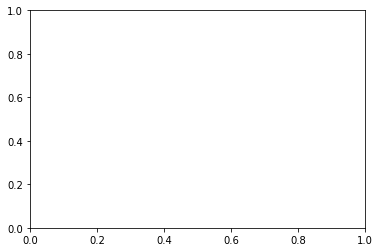

In [5]:
%matplotlib inline
#there are other ways to grab frames, such as uniformly; please see the paper:

#AUTOMATIC:
deeplabcut.extract_frames(path_config_file, crop=True, opencv=False, flymovie=True, algo='uniform') 

#AND/OR:
#SELECT RARE EVENTS MANUALLY:
#%gui wx
#deeplabcut.extract_frames(path_config_file,'manual')

## Label the extracted frames

Only videos in the config file can be used to extract the frames. Extracted labels for each video are stored in the project directory under the subdirectory **'labeled-data'**. Each subdirectory is named after the name of the video. The toolbox has a labeling toolbox which could be used for labeling. 

In [ ]:
import deeplabcut
%gui wx
deeplabcut.label_frames(path_config_file)

RuntimeError: wrapped C/C++ object of type DirDialog has been deleted

## Check the labels

[OPTIONAL] Checking if the labels were created and stored correctly is beneficial for training, since labeling is one of the most critical parts for creating the training dataset. The DeepLabCut toolbox provides a function `check\_labels'  to do so. It is used as follows:

In [2]:
deeplabcut.check_labels("C:/Users/jwagner2/git/scepto_bug_arena/fighting-Julian-2019-07-08/config.yaml") #this creates a subdirectory with the frames + your labels

Creating images with labels by Julian.
They are stored in the following folder: C:\Users\jwagner2\git\scepto_bug_arena\fighting-Julian-2019-07-08\labeled-data\20190114_ant_scepto_male_cam_0_date_2019_01_14_time_17_40_14_v001_labeled.
They are stored in the following folder: C:\Users\jwagner2\git\scepto_bug_arena\fighting-Julian-2019-07-08\labeled-data\20190322_ant_bug_cam_1_date_2019_03_22_time_14_06_53_v001_labeled.
If all the labels are ok, then use the function 'create_training_dataset' to create the training dataset!


In [4]:
path_config_file = "C:/Users/jwagner2/git/scepto_bug_arena/fighting-Julian-2019-07-08/config.yaml"

If the labels need adjusted, you can use relauch the labeling GUI to move them around, save, and re-plot!

## Create a training dataset

This function generates the training data information for network training based on the pandas dataframes that hold label information. The user can set the fraction of the training set size (from all labeled image in the hd5 file) in the config.yaml file. While creating the dataset, the user can create multiple shuffles if they want to benchmark the performance (typcailly, 1 is what you will set, so you pass nothing!). 

After running this script the training dataset is created and saved in the project directory under the subdirectory **'training-datasets'**

This function also creates new subdirectories under **dlc-models** and appends the project config.yaml file with the correct path to the training and testing pose configuration file. These files hold the parameters for training the network. Such an example file is provided with the toolbox and named as **pose_cfg.yaml**. For most all use cases we have seen, the defaults are perfectly fine.

Now it is the time to start training the network!

In [4]:
deeplabcut.create_training_dataset(path_config_file)

The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


In [2]:
import tensorflow as tf
tf.__version__
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 11429670737615436997, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 4866611609
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 12760776736637167724
 physical_device_desc: "device: 0, name: GeForce GTX 1660 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"]

## Start training:

This function trains the network for a specific shuffle of the training dataset. 

In [2]:
#deeplabcut.train_network?

In [1]:
#deeplabcut.train_network?

In [5]:
deeplabcut.train_network(path_config_file, gputouse=0, displayiters=10)

Config:
{'all_joints': [[0], [1], [2], [3], [4], [5], [6], [7], [8]],
 'all_joints_names': ['scepto_head',
                      'scepto_thorax',
                      'scepto_abdomen',
                      'lio_head',
                      'lio_thorax',
                      'lio_abdomen',
                      'bug_head',
                      'bug_thorax',
                      'bug_abdomen'],
 'batch_size': 1,
 'bottomheight': 400,
 'crop': True,
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_fightingJul8\\fighting_Julian95shuffle1.mat',
 'dataset_type': 'default',
 'deterministic': False,
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': 'c:\\users\\jwagner2\\git\\deeplabcut\\deeplabcut\\pose_estimation_tensorflow\\models\\pretrained\\resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'leftwidth': 400,
 'location_refinement': True,
 'locref_huber_los

Starting with standard pose-dataset loader.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


NameError: name 'c' is not defined

In [16]:
tf.Session(config=tf.ConfigProto(log_device_placement=True))

## Start evaluating
This funtion evaluates a trained model for a specific shuffle/shuffles at a particular state or all the states on the data set (images)
and stores the results as .csv file in a subdirectory under **evaluation-results**

In [1]:
import deeplabcut
path_config_file = "C:/Users/jwagner2/git/scepto_bug_arena/fighting-Julian-2019-07-08/config.yaml"

In [2]:
deeplabcut.evaluate_network(path_config_file, plotting=True)

Running  DeepCut_resnet50_fightingJul8shuffle1_400000  with # of trainingiterations: 400000
Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Use standard file APIs to check for files with this prefix.


Instructions for updating:
Use standard file APIs to check for files with this prefix.


INFO:tensorflow:Restoring parameters from C:\Users\jwagner2\git\scepto_bug_arena\fighting-Julian-2019-07-08\dlc-models\iteration-0\fightingJul8-trainset95shuffle1\train\snapshot-400000


INFO:tensorflow:Restoring parameters from C:\Users\jwagner2\git\scepto_bug_arena\fighting-Julian-2019-07-08\dlc-models\iteration-0\fightingJul8-trainset95shuffle1\train\snapshot-400000


Analyzing data...


190it [00:22,  8.33it/s]


Done and results stored for snapshot:  snapshot-400000
Results for 400000  training iterations: 95 1 train error: 1.41 pixels. Test error: 3.71  pixels.
With pcutoff of 0.1  train error: 1.41 pixels. Test error: 3.0 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...
The network is evaluated and the results are stored in the subdirectory 'evaluation_results'.
If it generalizes well, choose the best model for prediction and update the config file with the appropriate index for the 'snapshotindex'.
Use the function 'analyze_video' to make predictions on new videos.
Otherwise consider retraining the network (see DeepLabCut workflow Fig 2)


## Start Analyzing videos
This function analyzes the new video. The user can choose the best model from the evaluation results and specify the correct snapshot index for the variable **snapshotindex** in the **config.yaml** file. Otherwise, by default the most recent snapshot is used to analyse the video.

The results are stored in hd5 file in the same directory where the video resides. 

In [ ]:
#deeplabcut.analyze_videos?

 92%|█████████▏| 56473/61472 [16:30<01:28, 56.68it/s]

In [1]:
path_config_file = "C:/Users/jwagner2/git/scepto_bug_arena/fighting-Julian-2019-07-08/config.yaml"
videofile_path = [r'C:\Users\jwagner2\Documents\20190322_ant_bug_cam_1_date_2019_03_22_time_14_06_53_v001.fmf'] #Enter a folder OR a list of videos to analyze.

deeplabcut.analyze_videos(path_config_file,videofile_path, videotype='.fmf')

## Extract outlier frames [optional step]

This is an optional step and is used only when the evaluation results are poor i.e. the labels are incorrectly predicted. In such a case, the user can use the following function to extract frames where the labels are incorrectly predicted. This step has many options, so please look at:

In [3]:
deeplabcut.extract_outlier_frames?

In [ ]:
deeplabcut.extract_outlier_frames(path_config_file,['/videos/video3.avi']) #pass a specific video

## Refine Labels [optional step]
Following the extraction of outlier frames, the user can use the following function to move the predicted labels to the correct location. Thus augmenting the training dataset. 

In [ ]:
%gui wx
deeplabcut.refine_labels(path_config_file)

**NOTE:** Afterwards, if you want to look at the adjusted frames, you can load them in the main GUI by running: ``deeplabcut.label_frames(path_config_file)``

(you can add a new "cell" below to add this code!)

#### Once all folders are relabeled, check the labels again! If you are not happy, adjust them in the main GUI:

``deeplabcut.label_frames(path_config_file)``

Check Labels:

``deeplabcut.check_labels(path_config_file)``

In [ ]:
#NOW, merge this with your original data:

deeplabcut.merge_datasets(path_config_file)

In [ ]:
#deeplabcut.merge_datasets?

## Create a new iteration of training dataset [optional step]
Following the refinement of labels and appending them to the original dataset, this creates a new iteration of training dataset. This is automatically set in the config.yaml file, so let's get training!

In [ ]:
deeplabcut.create_training_dataset(path_config_file)

## Create labeled video
This funtion is for visualiztion purpose and can be used to create a video in .mp4 format with labels predicted by the network. This video is saved in the same directory where the original video resides. 

THIS HAS MANY FUN OPTIONS! 

``deeplabcut.create_labeled_video(config, videos, videotype='avi', shuffle=1, trainingsetindex=0, filtered=False, save_frames=False, Frames2plot=None, delete=False, displayedbodyparts='all', codec='mp4v', outputframerate=None, destfolder=None, draw_skeleton=False, trailpoints=0, displaycropped=False)``

So please check:

In [ ]:
#deeplabcut.create_labeled_video?

In [ ]:
import deeplabcut
path_config_file = "C:/Users/jwagner2/git/scepto_bug_arena/fighting-Julian-2019-07-08/config.yaml"
videofile_path = [r'C:\Users\jwagner2\Documents\20190322_ant_bug_cam_1_date_2019_03_22_time_14_06_53_v001.fmf'] #Enter a folder OR a list of videos to analyze.


deeplabcut.create_labeled_video(path_config_file,videofile_path, displaycropped=True)

Starting %  C:\Users\jwagner2\Documents ['C:\\Users\\jwagner2\\Documents\\20190322_ant_bug_cam_1_date_2019_03_22_time_14_06_53_v001.fmf']
Loading  C:\Users\jwagner2\Documents\20190322_ant_bug_cam_1_date_2019_03_22_time_14_06_53_v001.fmf and data.
True 1990 2425 175 610
61474
<VideoWriter 000001660A331130>
Duration of video [s]:  1024.53 , recorded with  60 fps!
Overall # of frames:  61472 with cropped frame dimensions:  435 435
Generating frames and creating video.


 10%|█         | 6393/61472 [01:49<15:13, 60.31it/s]

## Plot the trajectories of the analyzed videos
This function plots the trajectories of all the body parts across the entire video. Each body part is identified by a unique color.

In [ ]:
%matplotlib notebook #for making interactive plots.
deeplabcut.plot_trajectories(path_config_file,videofile_path)